https://d2l.ai/chapter_introduction/index.html

#module import

In [1]:
!pip install --upgrade d2l==1.0.0-alpha1.post0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import random

#2. preliminaries

## 2-1

In [ ]:
x = torch.arange(12, dtype=torch.float32)
print(x,x.numel(),x.shape)

In [ ]:
X = x.reshape(3, 4)
X

In [ ]:
x = torch.zeros(3,4)
y = torch.ones(3,4)
z = torch.randn(3,4)

x,y,z

In [ ]:
z[-1], z[1:3], z[:2,:]

In [ ]:
torch.exp(z)

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

In [ ]:
X == Y, X.sum()

In [ ]:
a = torch.arange(3).reshape((3, 1)) #broadcasting
b = torch.arange(2).reshape((1, 2))
a, b, a + b

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

##2-1 saving memory (처음보는 부분)

Running operations can cause new memory to be allocated to host results. For example, if we write Y = X + Y, we dereference the tensor that Y used to point to and instead point Y at the newly allocated memory. We can demonstrate this issue with Python’s id() function, which gives us the exact address of the referenced object in memory. Note that after we run Y = Y + X, id(Y) points to a different location. That is because Python first evaluates Y + X, allocating new memory for the result and then points Y to this new location in memory.

같은 변수에 x = x+y로 하면 메모리 사용량 증가
x+=y 또는 z[:] = x+y 통해 관리하기

In [14]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [17]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))
print(id(Y),id(X))

id(Z): 139910744991088
id(Z): 139910744991088
139910746721472 139910911643136


In [16]:
before = id(X)
X += Y
id(X) == before

True

## 2-1 exercise

In [21]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

In [22]:
X==Y, X!=Y, X>Y, Y<X

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[ True, False,  True, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

##2-2

In [23]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [30]:
data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [25]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [27]:
##NAN을 평균으로 전환
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [29]:
X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

##2-2 exercise

문제에 대한 정답: pandas의 dataframe을 이용해 엑셀 csv형식의 파일로 저장/읽기를 수행한다.

In [38]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [33]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
df.set_index('longitude',inplace=True)
df

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,,,,,,,,
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...
-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


##2-3

In [49]:
A = torch.arange(6).reshape(3, 2)
A,A.T

(tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]))

In [50]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [51]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [54]:
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [56]:
A.shape, A.sum()

(torch.Size([3, 2]), tensor(15))

In [58]:
A.sum(axis=[0, 1]) == A.sum() # Same as A.sum()

tensor(True)

In [59]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[1],
         [5],
         [9]]),
 torch.Size([3, 1]))

In [60]:
sum_A = A.sum(axis=0, keepdims=True)
sum_A, sum_A.shape

(tensor([[6, 9]]), torch.Size([1, 2]))

In [61]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [63]:
torch.sum(x * y) # same as dot product

tensor(3.)

In [92]:
A = torch.arange(6 , dtype=torch.float32).reshape( (2, 3))
B = torch.ones( (3,4) ,dtype=torch.float32)

A,B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

In [93]:
type(A),type(B)


(torch.Tensor, torch.Tensor)

In [96]:
torch.mm(A, B), A@B # [2,3] * [3,4] = [2,4]

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

##2-3 L2 norm and L1 norm

In [99]:
u = torch.tensor([3.0, -4.0]) #L2 norm (유클리드 distance)
torch.norm(u)

tensor(5.)

In [100]:
torch.abs(u).sum() #L1 norm (sum of abs)

tensor(7.)

##2-3 exercise

1~3. 선형대수 기초 내용, pass
4. len(x)는 x tensor의 첫 dim
5. 4번과 동일
6. A / A.sum(axis=1) and see what happens. -> 차원이 다름. A=[3,2]이라면 A.sum(axis=1)은 [3] -> 코드 의도대로면 A.reshape()를 해야 함.
7. When traveling between two points in downtown Manhattan -> L1 distance
8. axis=i 라면 i를 제외한 나머지 차원들 형태
9. 아래 코드 참조
10~13. 아래 코드 참조

In [101]:
#6 example
A = np.array( [[0,1],
              [2,3],
              [4,5]])

A, A.sum(axis=1)

(array([[0, 1],
        [2, 3],
        [4, 5]]),
 array([1, 5, 9]))

In [106]:
#9 example
A = np.arange(64).reshape(4,4,2,2)
A

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]],


       [[[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]]],


       [[[32, 33],
         [34, 35]],

        [[36, 37],
         [38, 39]],

        [[40, 41],
         [42, 43]],

        [[44, 45],
         [46, 47]]],


       [[[48, 49],
         [50, 51]],

        [[52, 53],
         [54, 55]],

        [[56, 57],
         [58, 59]],

        [[60, 61],
         [62, 63]]]])

In [109]:
#10~13 example
#선형대수 내용 중 계산량의 차이!
import torch
import time

a = torch.randn([2**10,2**16])
b = torch.randn([2**16,2**5])
c = torch.randn([2**5,2**16])
start = time.time()
a@b
end = time.time()
delay0 = end-start
start = time.time()
a@c.T
end = time.time()
delay1 = end-start
print(delay0, ',', delay1, '|', delay0/delay1)

d = torch.randn([2**10,2**16])
e = torch.randn([2**16,2**5])
f = e.T
start = time.time()
d@e
end = time.time()
delay0 = end-start
start = time.time()
d@f.T
end = time.time()
delay1 = end-start
print(delay0, ',', delay1, '|', delay0/delay1) 

0.14262628555297852 , 0.17305946350097656 | 0.8241461210364476
0.10160613059997559 , 0.09852004051208496 | 1.0313244906503267


##2-4

In [3]:
#calculating diff(기울기)

def f(x):
    return 3 * x ** 2 - 4 * x


for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


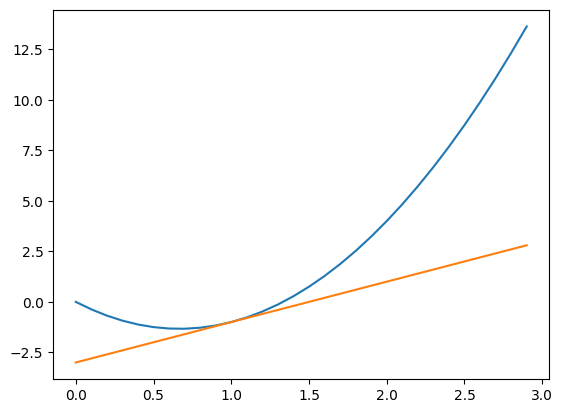

In [5]:
import matplotlib.pyplot as plt
x = np.arange(0, 3, 0.1)
plt.plot(x, f(x))
plt.plot(x, 2 * x - 3)

##2-4 exercise -> 단순 수학 계산, pass

##2-5

In [10]:
x = torch.arange(4.0, requires_grad=True)
x.grad  # The gradient is None by default

In [11]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [12]:
y.backward()
x.grad


tensor([ 0.,  4.,  8., 12.])

In [13]:
x.grad == 4 * x #제곱이므로 2차식, 미분값 = 2xx^T

tensor([True, True, True, True])

In [14]:
x.grad.zero_()  # Reset the gradient
y = x.sum() #sum이므로 1차식, 미분값 0
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [15]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [26]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
#연속 backpropagation 2번은 오류 발생
#y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()

In [17]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [23]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [24]:
a.grad

tensor(409600.)

In [19]:
a.grad == d / a

tensor(True)

##2-5 exercise

1. 2차 미분은 2번 연산이 필요
2. backpropagation 2번= 오류발생
3. backporpagtion 값이 scaler가 아니면 오류 발생. (편미분하기 때문)
4. 4~8.은 4번값 함수 그리기로 대체

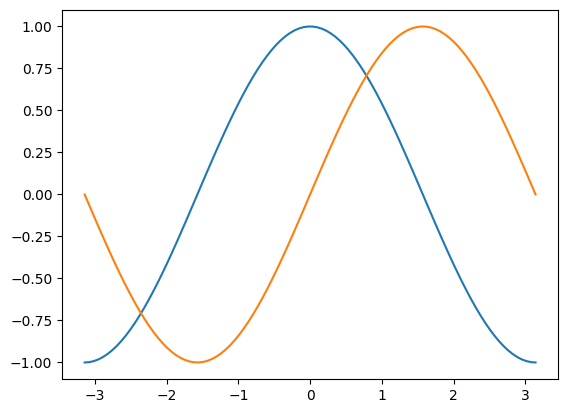

In [41]:

x = np.linspace(- np.pi,np.pi,100)
x = torch.tensor(x, requires_grad=True)
y = torch.sin(x)

for i in range(100):
  y[i].backward(retain_graph = True)

plt.plot(x.detach(),x.grad.detach() ) # 노란색, 미분값
plt.plot(x.detach(),np.sin(x.detach())) #파란색, 원래 값

##2-6

In [44]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [52, 48]


In [46]:
from torch.distributions.multinomial import Multinomial
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([46., 54.])

In [48]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

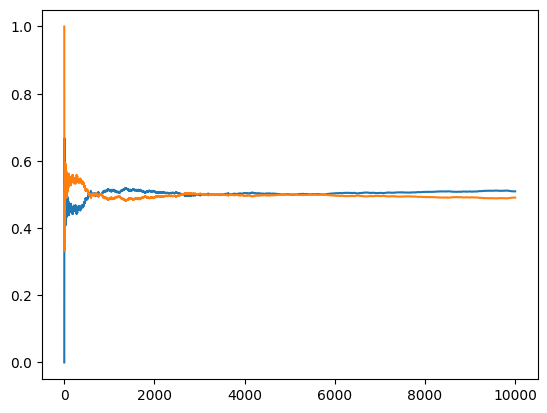

In [53]:
plt.plot(np.arange(10000),estimates) #점차 수렴함.

##2-6 exercise

torch.Size([1000, 4])


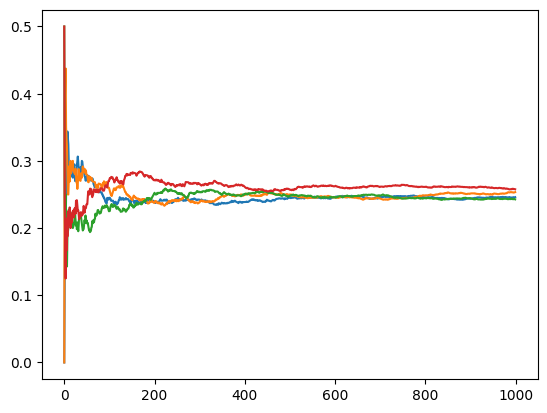

In [63]:
#example 3,4 | 나머지는 단순 계산, pass
def experiment_fig(n, m):
    fair_probs = np.ones(n)/n
    counts = torch.from_numpy(np.random.multinomial(n, fair_probs, size=m))
    cum_counts = counts.type(torch.float32).cumsum(axis=0)
    estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)
    print(estimates.size())
    plt.plot(np.arange(m),estimates) #점차 수렴함.


experiment_fig(4, 1000)

##2-7 -> 내용x

#3.linear regression

##3-1

In [240]:
n = 10000
a = torch.ones(n)
b = torch.ones(n) #속도차이 비교

In [241]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.17851 sec'

In [242]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00370 sec'

In [244]:
import math
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

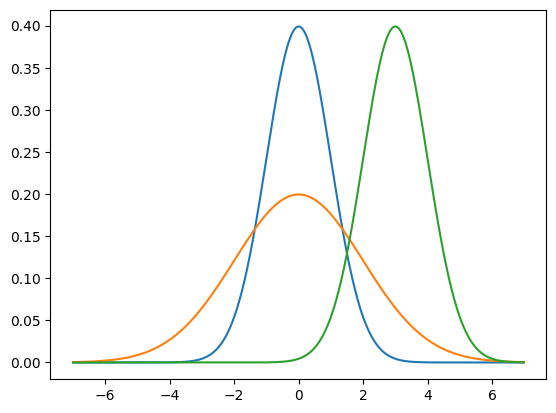

In [249]:
# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
plt.plot(x,normal(x, params[0][0], params[0][1]) )
plt.plot(x,normal(x, params[1][0], params[1][1]) )
plt.plot(x,normal(x, params[2][0], params[2][1]) )

##3-2

In [3]:
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

In [4]:
class DataModule(d2l.HyperParameters): 
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [5]:
class Trainer(d2l.HyperParameters):  
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

##3-3

In [13]:
class SyntheticRegressionData(d2l.DataModule): #y=wx + b + c
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [14]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [15]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([-0.3621,  1.7905]) 
label: tensor([-2.6132])


In [16]:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

In [17]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [20]:
@d2l.add_to_class(d2l.DataModule) 
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)

@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

In [21]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [22]:
len(data.train_dataloader())

32

##3-4

In [23]:
class LinearRegressionScratch(d2l.Module): 
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [24]:
@d2l.add_to_class(LinearRegressionScratch)  
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [25]:
@d2l.add_to_class(LinearRegressionScratch) 
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [26]:
class SGD(d2l.HyperParameters):  
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [28]:
@d2l.add_to_class(LinearRegressionScratch) 
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [29]:
@d2l.add_to_class(d2l.Trainer) 
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer) 
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

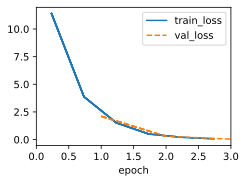

In [30]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [31]:
print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0742, -0.1585], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.2258], grad_fn=<RsubBackward1>)


##3-5

In [32]:
class LinearRegression(d2l.Module): 
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [33]:
@d2l.add_to_class(LinearRegression) 
def forward(self, X):
    return self.net(X)

In [34]:
@d2l.add_to_class(LinearRegression) 
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

In [35]:
@d2l.add_to_class(LinearRegression)  
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

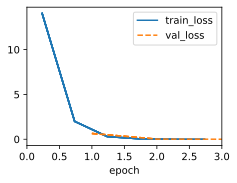

In [36]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [37]:
@d2l.add_to_class(LinearRegression) 
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0073, -0.0113])
error in estimating b: tensor([0.0136])


##3-6: code x

##3-7

In [38]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [39]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [40]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) +
                self.lambd * l2_penalty(self.w))

In [41]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

L2 norm of w: 0.010995917953550816


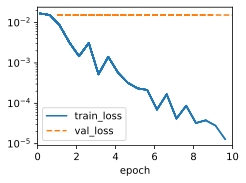

In [42]:
train_scratch(0)

L2 norm of w: 0.0013985475525259972


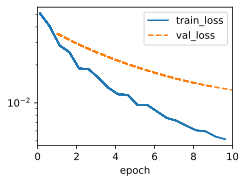

In [43]:
train_scratch(3)

In [44]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

L2 norm of w: 0.01499344501644373


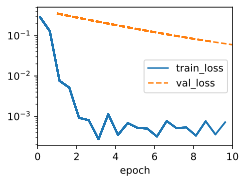

In [45]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

#4.linear classification

##4-1 코드x (sigmoid function, information theory)

##4-2, 4-3

In [211]:
import time
import torch
import torchvision
from torchvision import transforms

In [227]:
class FashionMNIST(nn.Module):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [226]:
class Classifier(nn.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [225]:
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

In [224]:
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

##4-4

In [237]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [238]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [239]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1301, 0.3124, 0.1537, 0.1405, 0.2632],
         [0.2558, 0.2015, 0.1156, 0.2347, 0.1924]]),
 tensor([1., 1.]))

In [228]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [234]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

[list(range(len(y_hat))),y]


[[0, 1], tensor([0, 2])]

In [236]:
y_hat[list(range(len(y_hat))), y]

tensor([0.1000, 0.5000])

In [235]:
cross_entropy(y_hat, y)

tensor(1.4979)

##4-5

In [223]:
#applying softmax in classification

class SoftmaxRegression(nn.Module): 
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)
    
    def loss(self, Y_hat, Y, averaged=True):
        Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
        Y = Y.reshape((-1,))
        return F.cross_entropy(
            Y_hat, Y, reduction='mean' if averaged else 'none')

##4-6, 4-7: 코드x

#5.MLP

##5-1 activation function

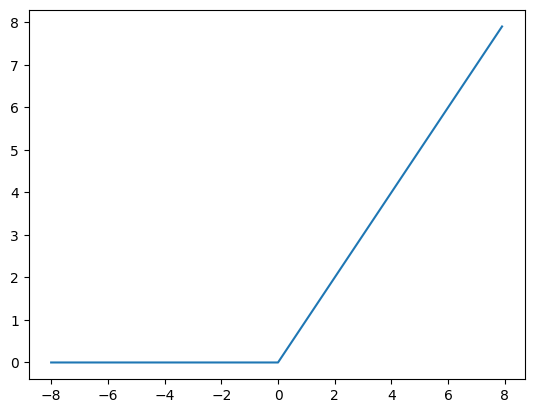

In [76]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) #activation fun relu
y = torch.relu(x)
plt.plot(x.detach(),y.detach())

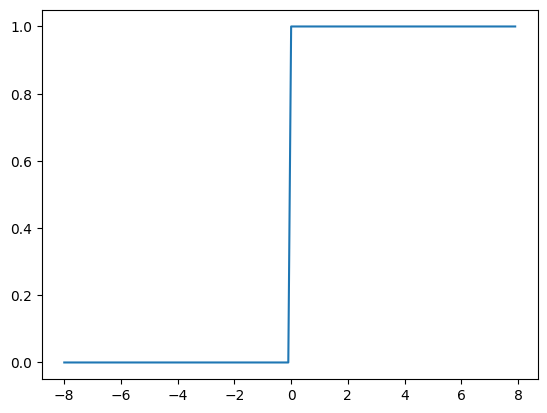

In [77]:
y.backward(torch.ones_like(x), retain_graph=True) #기울기
plt.plot(x.detach(),x.grad.detach())

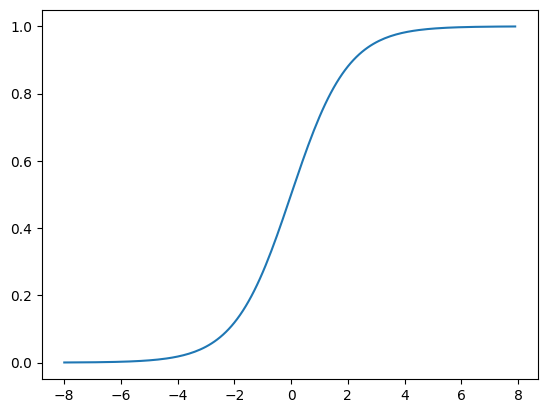

In [78]:
y = torch.sigmoid(x)
plt.plot(x.detach(),y.detach())

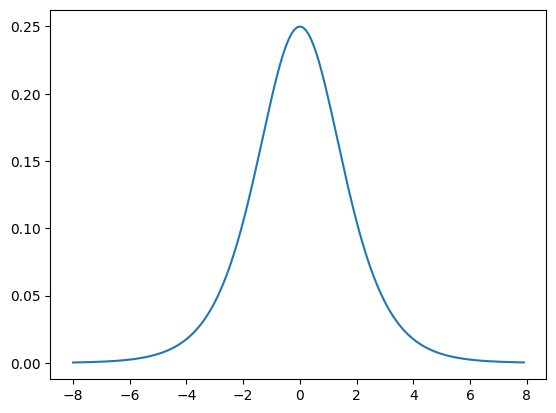

In [79]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True) #기울기
plt.plot(x.detach(),x.grad.detach())

In [ ]:
# + tanh sigmoid 함수도 있음

##5-2 MLP

In [ ]:
#d2l 모듈부분이 모두 오류가 나서 5-7 exercise pytorch로 대체
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

##5-2 exercise

1.Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?

2.Try adding a hidden layer to see how it affects the results.

3.Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong?

4.How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?

5.Let’s optimize over all hyperparameters jointly, i.e., learning rate, number of epochs, number of hidden layers, and number of hidden units per layer.

6.What is the best result you can get by optimizing over all of them?

7.Why it is much more challenging to deal with multiple hyperparameters?

8.Describe an efficient strategy for optimizing over multiple parameters jointly.

9.Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?

10.Measure the speed of tensor-matrix multiplications for well-aligned and misaligned matrices. For instance, test for matrices with dimension 1024, 1025, 1026, 1028, and 1032.

11.How does this change between GPUs and CPUs?

12.Determine the memory bus width of your CPU and GPU.

13.Try out different activation functions. Which one works best?

14.Is there a difference between weight initializations of the network? Does it matter?

1. 모델마다 다르다.
2. 일정 수준까진 증가, 그 이후는 감소
3. 정보 손실 발생 (차원 늘리는 것은 나중에 vit등에서 cotraction으로 해석 가능)
4. 너무 작으면 학습 원활히 x, 너무 크면 발산
5. pass
6. pass
7. pass
8. lr, batch size 조정
9. 모델이 크면 일반적으로 정확도 향상, 속도 느려짐
10. 차원 크면 속도 감소
11. pass
12. pass
13. sigmoid보다 relu가 좋은 성능 (DNN에서)
14. yes. loss function에서 시작지점이 다르기에, local minimum도달하는 곳 존재 가능

##5-3 ~ 5-6: 코드 x

##5-7. predicting exercise

In [132]:
train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [133]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [135]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.transform(test_df)

# MLP 모델 구현
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(1)
])



In [139]:
train_df_scaled[:,:-1],train_df_scaled[:,-1]

(array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.36118401,
         -0.07599796, -1.25254316],
        [ 2.53956878, -0.57326437, -0.76187201, ..., -0.26186523,
         -0.09940441, -1.08148298],
        [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.95535424,
         -0.99925206, -1.17010515],
        ...,
        [-2.36291168,  2.90780067, -0.92077158, ..., -0.16167524,
         -0.11760942, -0.44666313],
        [-2.36291168,  2.88908527, -0.76187201, ..., -0.1146295 ,
         -0.06039367, -0.99778717],
        [-2.387848  ,  2.29955006,  1.85997083, ..., -0.54326844,
         -0.60134255, -0.45536288]]),
 array([-1.21055773, -1.09674535, -1.04846131, ..., -0.89412482,
        -1.04759909, -0.97172417]))

In [141]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr=0.001))

# 모델 학습
model.fit(train_df_scaled[:,:-1], 
          train_df_scaled[:,-1], 
          epochs=50)

# 모델 예측
predictions = model.predict(test_df_scaled[:,:-1])

Epoch 1/50
532/532 [==============================] - 6s 9ms/step - loss: 0.2355
Epoch 2/50
532/532 [==============================] - 4s 7ms/step - loss: 0.2241
Epoch 3/50
532/532 [==============================] - 4s 8ms/step - loss: 0.2177
Epoch 4/50
532/532 [==============================] - 5s 10ms/step - loss: 0.2134
Epoch 5/50
532/532 [==============================] - 4s 7ms/step - loss: 0.2123
Epoch 6/50
532/532 [==============================] - 6s 11ms/step - loss: 0.2069
Epoch 7/50
532/532 [==============================] - 8s 14ms/step - loss: 0.2061
Epoch 8/50
532/532 [==============================] - 5s 9ms/step - loss: 0.2008
Epoch 9/50
532/532 [==============================] - 5s 10ms/step - loss: 0.1994
Epoch 10/50
532/532 [==============================] - 7s 12ms/step - loss: 0.1956
Epoch 11/50
532/532 [==============================] - 4s 7ms/step - loss: 0.1954
Epoch 12/50
532/532 [==============================] - 4s 7ms/step - loss: 0.1945
Epoch 13/50
532/532 

#6.Builder's guide

##6-1

In [142]:
import torch
from torch import nn
from torch.nn import functional as F

In [143]:
net = nn.Sequential(nn.LazyLinear(256), nn.ReLU(), nn.LazyLinear(10))

X = torch.rand(2, 20)
net(X).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 10])

In [144]:
class MLP(nn.Module):
    def __init__(self):
        # Call the constructor of the parent class nn.Module to perform
        # the necessary initialization
        super().__init__()
        self.hidden = nn.LazyLinear(256)
        self.out = nn.LazyLinear(10)

    # Define the forward propagation of the model, that is, how to return the
    # required model output based on the input X
    def forward(self, X):
        return self.out(F.relu(self.hidden(X)))

In [145]:
net = MLP()
net(X).shape


torch.Size([2, 10])

In [147]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args): #여러개의 모둘 연달아 실행
            self.add_module(str(idx), module)

    def forward(self, X):
        for module in self.children():
            X = module(X)
        return X

In [148]:
net = MySequential(nn.LazyLinear(256), nn.ReLU(), nn.LazyLinear(10))
net(X).shape

torch.Size([2, 10])

In [149]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        # Random weight parameters that will not compute gradients and
        # therefore keep constant during training
        self.rand_weight = torch.rand((20, 20))
        self.linear = nn.LazyLinear(20)

    def forward(self, X):
        X = self.linear(X)
        X = F.relu(X @ self.rand_weight + 1)
        # Reuse the fully connected layer. This is equivalent to sharing
        # parameters with two fully connected layers
        X = self.linear(X)
        # Control flow
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

In [150]:
net = FixedHiddenMLP()
net(X)

tensor(0.1495, grad_fn=<SumBackward0>)

In [151]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.LazyLinear(64), nn.ReLU(),
                                 nn.LazyLinear(32), nn.ReLU())
        self.linear = nn.LazyLinear(16)

    def forward(self, X):
        return self.linear(self.net(X))

chimera = nn.Sequential(NestMLP(), nn.LazyLinear(20), FixedHiddenMLP())
chimera(X)

tensor(-0.3122, grad_fn=<SumBackward0>)

##6-2

In [152]:
net = nn.Sequential(nn.LazyLinear(8),
                    nn.ReLU(),
                    nn.LazyLinear(1))

X = torch.rand(size=(2, 4))
net(X).shape

torch.Size([2, 1])

In [153]:
net[2].state_dict()

OrderedDict([('weight',
              tensor([[ 0.3251,  0.2500, -0.1052, -0.0994, -0.0837, -0.2176,  0.1718, -0.2084]])),
             ('bias', tensor([-0.3412]))])

In [154]:
[(name, param.shape) for name, param in net.named_parameters()]

[('0.weight', torch.Size([8, 4])),
 ('0.bias', torch.Size([8])),
 ('2.weight', torch.Size([1, 8])),
 ('2.bias', torch.Size([1]))]

In [155]:
# We need to give the shared layer a name so that we can refer to its
# parameters
shared = nn.LazyLinear(8)
net = nn.Sequential(nn.LazyLinear(8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.LazyLinear(1))

net(X)
# Check whether the parameters are the same
print(net[2].weight.data[0] == net[4].weight.data[0])
net[2].weight.data[0, 0] = 100
# Make sure that they are actually the same object rather than just having the
# same value
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


##6-3

In [158]:
net = nn.Sequential(nn.LazyLinear(8), nn.ReLU(), nn.LazyLinear(1))
X = torch.rand(size=(2, 4))
net(X).shape

torch.Size([2, 1])

In [157]:
def init_normal(module):
    if type(module) == nn.Linear:
        nn.init.normal_(module.weight, mean=0, std=0.01)
        nn.init.zeros_(module.bias)

net.apply(init_normal)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([-0.0305,  0.0104, -0.0080,  0.0060]), tensor(0.))

In [156]:
#custom initialize
def my_init(module): 
    if type(module) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in module.named_parameters()][0])
        nn.init.uniform_(module.weight, -10, 10)
        module.weight.data *= module.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([8, 8])
Init weight torch.Size([1, 8])


tensor([[ 7.6094,  0.0000,  0.0000,  9.7295],
        [-8.6885,  0.0000,  5.2309,  9.3368]], grad_fn=<SliceBackward0>)

##6-4

init할 layer의 차원을 모를 때 lazy initializing

We defined the network architectures without specifying the input dimensionality.

We added layers without specifying the output dimension of the previous layer.

We even “initialized” these parameters before providing enough information to determine how many parameters our models should contain.

In [159]:
net = nn.Sequential(nn.LazyLinear(256), nn.ReLU(), nn.LazyLinear(10))

In [160]:
X = torch.rand(2, 20)
net(X)

net[0].weight.shape

torch.Size([256, 20])

In [163]:
def apply_init(self, inputs, init=None):
    self.forward(*inputs)
    if init is not None:
        self.net.apply(init)

##6-5 

layers without parameter:
  init layer 없고 forward에서 x - x.mean() 등으로만 이루어진 모델

laters with paramter:
  아래 코드 참조

In [164]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))

    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)

In [165]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[ 0.7229,  1.4014, -1.3662],
        [-0.6435,  0.5228,  0.1883],
        [-0.4682,  1.6869, -1.0430],
        [ 1.1085, -1.2320,  0.1310],
        [ 1.6741, -1.1262,  0.4890]], requires_grad=True)

##6-6, 6-7: 생략(gpu 사용법, model save방법)

#7.CNN

##7-1: 실습코드x

##7-2

In [167]:
#Convolution area
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [168]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

In [169]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [170]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [171]:
K = torch.tensor([[1.0, -1.0]])

In [172]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [174]:
corr2d(X.t(), K) #transform 적용해서 x 1 1 1 1부분이 (1+-1) 커널에서 더해져서 0이 됨.

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [175]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 11.763
epoch 4, loss 3.262
epoch 6, loss 1.075
epoch 8, loss 0.396
epoch 10, loss 0.155


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [176]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9468, -1.0268]])

##7-2 exercise

1-1. 변화x

1-2. same

1-3. same

2-4. d-1 (정확하지 않음)

3. Inplace operations are not supported using autograd

4. ?


In [182]:
X = torch.tensor([[1,1],
                 [0,0]])

K = torch.tensor([[1.0, -1.0]]) # filter shape: (1, 2)
# flip horizontally
K = torch.flip(K, [1])
# flip vertically
K = torch.flip(K, [0])
print(K)
print(K)

Y = corr2d(X, K)
Y

tensor([[-1.,  1.]])
tensor([[-1.,  1.]])


tensor([[0.],
        [0.]])

##7-3

In [183]:
#padding

# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([8, 8])

In [184]:
# We use a convolution kernel with height 5 and width 3. The padding on either
# side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [189]:
X.shape

torch.Size([8, 8])

stride

In [190]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([4, 4])

In [191]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

##7-3 exercise


4. 연산량 감소
5. 더 큰 범위의 feature을 학습
6. 연산량 증가, conv는 차원 축소 or 확대를 위한 것인데, 1/2는 VIT에서 extraction part에 사용 (feature로부터 전체 이미지 생성하는 모델에서 유용

##7-4

In [192]:
#1x1 conv 연산 예시 -> feature map 크기 그대로, 차원 증가/감소

def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [196]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y1.shape, Y1

(torch.Size([2, 3, 3]),
 tensor([[[-0.2877,  2.7691,  1.0529],
          [ 2.6781,  4.1921, -1.0198],
          [ 1.5067,  0.5964,  3.0390]],
 
         [[ 0.2292,  4.6107, -3.2671],
          [-1.3686,  1.7052,  2.3331],
          [ 0.4571,  3.0326,  0.7067]]]))

##7-5

max pooling, avg pooling

In [197]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [202]:
X = torch.tensor([[0.0, 1.0, 2.0], 
                  [3.0, 4.0, 5.0], 
                  [6.0, 7.0, 8.0]] )
pool2d(X, (2, 2),'max')

tensor([[4., 5.],
        [7., 8.]])

In [203]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [204]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [205]:
pool2d = nn.MaxPool2d(3)
# Pooling has no model parameters, hence it needs no initialization
pool2d(X)

tensor([[[[10.]]]])

In [206]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

##7-6 LeNet

In [208]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
        self.fc1 = nn.Linear(4*4*64, 500) # 32x32 -> 28x28 -> 14x14 -> 10x10 -> 5x5 -> 4x4
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*64)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

model = LeNet()
model

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)